In [1]:
from coffea.nanoevents import NanoEventsFactory, BaseSchema, PFNanoAODSchema
import json
import fastjet
import numpy as np
import awkward as ak
from coffea import processor
import hist
import coffea.nanoevents.methods.vector as vector
import warnings
import matplotlib.pyplot as plt
import math

/tmp/ipykernel_364213/1518451047.py:8: FutureWarning: In version 2024.7.0 (target date: 2024-06-30 11:59:59-05:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  import coffea.nanoevents.methods.vector as vector


In [2]:
warnings.filterwarnings("ignore", module="coffea.*")
warnings.filterwarnings("ignore", "Found duplicate branch")
warnings.filterwarnings("ignore", "Missing cross-reference index for")
warnings.filterwarnings("ignore", "dcut")
warnings.filterwarnings("ignore", "Please ensure")
warnings.filterwarnings("ignore", "invalid value")

In [3]:
with open('../../filelists/hgg_files.txt', 'r') as f:
    hgg_files = [line.strip() for line in f]
with open('../../filelists/hbb_files.txt', 'r') as f:
    hbb_files = [line.strip() for line in f]
with open('../../filelists/300to470_files.txt', 'r') as f:
    qcd_files = [line.strip() for line in f]

In [41]:
qcd = NanoEventsFactory.from_root(
    {'/project01/ndcms/cmoore24/qcd/300to470/' + qcd_files[0]: "/Events"},
    delayed=False,
    schemaclass=PFNanoAODSchema,
    metadata={"dataset": "QCD"},
).events()

In [65]:
qgp = qcd.GenPart

In [66]:
c1 = qgp.children
c2 = qgp.children.children
c3 = qgp.children.children.children
c4 = qgp.children.children.children.children
c5 = qgp.children.children.children.children.children
c6 = qgp.children.children.children.children.children.children
c7 = qgp.children.children.children.children.children.children.children
c8 = qgp.children.children.children.children.children.children.children.children
c9 = qgp.children.children.children.children.children.children.children.children.children
c10 = qgp.children.children.children.children.children.children.children.children.children.children
c11 = qgp.children.children.children.children.children.children.children.children.children.children.children

In [67]:
c2 = ak.flatten(c2, axis=2)
c3 = ak.flatten(ak.flatten(c3, axis=2), axis=2)
c4 = ak.flatten(ak.flatten(ak.flatten(c4, axis=2), axis=2), axis=2)
c5 = ak.flatten(ak.flatten(ak.flatten(ak.flatten(c5, axis=2), axis=2), axis=2), axis=2)
c6 = ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(c6, axis=2), axis=2), axis=2), axis=2), axis=2)
c7 = ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(c7, axis=2), axis=2), axis=2), axis=2), axis=2), axis=2)
c8 = ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(c8, axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2)
c9 = ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(c9, axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2)
c10 = ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(c10, axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2)
c11 = ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(ak.flatten(c11, axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2), axis=2)

In [68]:
many_children = ak.concatenate([c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11], axis=1)

In [69]:
cut = many_children.hasFlags(['isLastCopy', 'isLastCopyBeforeFSR'])
cut2 = many_children.hasFlags(['isLastCopy'])

In [70]:
many_children = many_children[cut2]
a = np.unique(ak.flatten(ak.flatten(abs(many_children.pdgId))), return_counts=True)
#a = np.unique(ak.flatten(abs(many_children.pdgId)), return_counts=True)

In [74]:
hbparticles = []
for i in a[0]:
    hbparticles.append(pdgid_table[str(i)])

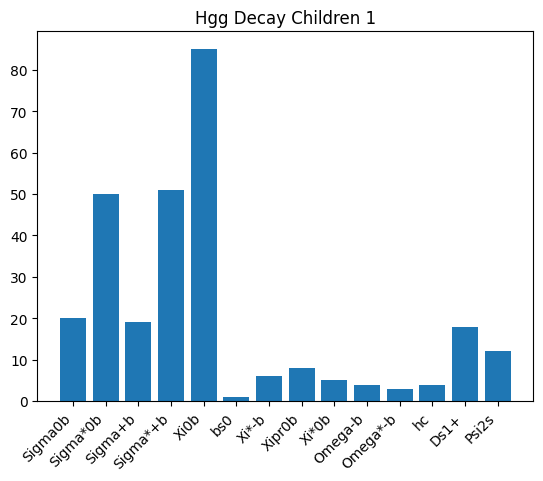

In [76]:
plt.bar(hbparticles[80:], a[1][80:])
plt.xticks(rotation=45, ha="right")
plt.title('Hgg Decay Children 1')
plt.show()